<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total 91-106

In [1]:
%pip install shap
%matplotlib inline
%pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

from catboost import Pool, CatBoostRegressor

# Data

In [3]:
df = pd.read_stata('W:\COVID19\std_inz91_106.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
df.head()

,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,...,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_75to91,std_inz_91to106,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,...,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,51.103943,28.917685,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,...,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,97.875450,93.475174,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,...,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,125.029121,104.266823,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,...,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,23.919840,15.950323,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,...,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,38.366455,45.772846,1.0


In [5]:
Y = df['std_inz_91to106']
X = df.loc[:, ~df.columns.isin(['std_inz_91to106', 'eastwest'])]

# RF model

In [6]:
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
rf=rfr.fit(X, Y)  

# R2 RF model

In [7]:
rf.score(X, Y)

0.9468061766182394

# CatBoost Model

In [8]:
# initialize Pool
train_pool = Pool(X,Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0)
#train the model
cb = model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(train_pool)
#print(preds)

Learning rate set to 0.033171
0:	learn: 71.5764063	total: 152ms	remaining: 2m 32s
1:	learn: 70.6242485	total: 159ms	remaining: 1m 19s
2:	learn: 69.7323829	total: 166ms	remaining: 55s
3:	learn: 68.9753810	total: 172ms	remaining: 42.8s
4:	learn: 68.1943953	total: 179ms	remaining: 35.6s
5:	learn: 67.4188768	total: 186ms	remaining: 30.8s
6:	learn: 66.6205921	total: 193ms	remaining: 27.3s
7:	learn: 65.7083575	total: 199ms	remaining: 24.7s
8:	learn: 64.9849102	total: 206ms	remaining: 22.7s
9:	learn: 64.1945452	total: 212ms	remaining: 21s
10:	learn: 63.4261220	total: 220ms	remaining: 19.8s
11:	learn: 62.7028575	total: 226ms	remaining: 18.6s
12:	learn: 61.9604028	total: 233ms	remaining: 17.7s
13:	learn: 61.3198010	total: 240ms	remaining: 16.9s
14:	learn: 60.6172527	total: 247ms	remaining: 16.2s
15:	learn: 60.0519085	total: 254ms	remaining: 15.6s
16:	learn: 59.2815249	total: 261ms	remaining: 15.1s
17:	learn: 58.6404510	total: 267ms	remaining: 14.6s
18:	learn: 58.0023763	total: 275ms	remaining: 

161:	learn: 26.3862377	total: 1.26s	remaining: 6.5s
162:	learn: 26.3526415	total: 1.26s	remaining: 6.49s
163:	learn: 26.3169448	total: 1.27s	remaining: 6.48s
164:	learn: 26.2234005	total: 1.28s	remaining: 6.46s
165:	learn: 26.1306849	total: 1.28s	remaining: 6.45s
166:	learn: 26.0360802	total: 1.29s	remaining: 6.44s
167:	learn: 25.9354018	total: 1.3s	remaining: 6.43s
168:	learn: 25.8598517	total: 1.3s	remaining: 6.41s
169:	learn: 25.7353704	total: 1.31s	remaining: 6.4s
170:	learn: 25.7094094	total: 1.32s	remaining: 6.39s
171:	learn: 25.5890275	total: 1.32s	remaining: 6.38s
172:	learn: 25.5557625	total: 1.33s	remaining: 6.36s
173:	learn: 25.4788793	total: 1.34s	remaining: 6.35s
174:	learn: 25.4442786	total: 1.34s	remaining: 6.34s
175:	learn: 25.3224853	total: 1.35s	remaining: 6.33s
176:	learn: 25.2848770	total: 1.36s	remaining: 6.31s
177:	learn: 25.2261833	total: 1.36s	remaining: 6.3s
178:	learn: 25.1098142	total: 1.37s	remaining: 6.29s
179:	learn: 25.0724980	total: 1.38s	remaining: 6.28

323:	learn: 16.2728137	total: 2.33s	remaining: 4.86s
324:	learn: 16.2018181	total: 2.34s	remaining: 4.85s
325:	learn: 16.1903294	total: 2.34s	remaining: 4.84s
326:	learn: 16.1087076	total: 2.35s	remaining: 4.83s
327:	learn: 16.0961870	total: 2.35s	remaining: 4.82s
328:	learn: 16.0832845	total: 2.36s	remaining: 4.82s
329:	learn: 16.0336370	total: 2.37s	remaining: 4.81s
330:	learn: 15.9453550	total: 2.37s	remaining: 4.8s
331:	learn: 15.9055151	total: 2.38s	remaining: 4.79s
332:	learn: 15.8191138	total: 2.39s	remaining: 4.78s
333:	learn: 15.7653169	total: 2.39s	remaining: 4.77s
334:	learn: 15.6823118	total: 2.4s	remaining: 4.76s
335:	learn: 15.6722847	total: 2.4s	remaining: 4.75s
336:	learn: 15.6117082	total: 2.41s	remaining: 4.75s
337:	learn: 15.5750094	total: 2.42s	remaining: 4.74s
338:	learn: 15.5425843	total: 2.42s	remaining: 4.73s
339:	learn: 15.4804714	total: 2.43s	remaining: 4.72s
340:	learn: 15.4073156	total: 2.44s	remaining: 4.71s
341:	learn: 15.3594283	total: 2.44s	remaining: 4.

480:	learn: 10.0752469	total: 3.4s	remaining: 3.67s
481:	learn: 10.0356488	total: 3.41s	remaining: 3.67s
482:	learn: 10.0228919	total: 3.42s	remaining: 3.66s
483:	learn: 9.9894652	total: 3.43s	remaining: 3.65s
484:	learn: 9.9527048	total: 3.43s	remaining: 3.65s
485:	learn: 9.9155220	total: 3.44s	remaining: 3.64s
486:	learn: 9.8805074	total: 3.45s	remaining: 3.63s
487:	learn: 9.8726396	total: 3.46s	remaining: 3.63s
488:	learn: 9.8642624	total: 3.46s	remaining: 3.62s
489:	learn: 9.8255368	total: 3.47s	remaining: 3.61s
490:	learn: 9.7738013	total: 3.48s	remaining: 3.6s
491:	learn: 9.7647641	total: 3.48s	remaining: 3.6s
492:	learn: 9.7594584	total: 3.49s	remaining: 3.59s
493:	learn: 9.6982433	total: 3.5s	remaining: 3.58s
494:	learn: 9.6409450	total: 3.5s	remaining: 3.58s
495:	learn: 9.6012132	total: 3.51s	remaining: 3.57s
496:	learn: 9.5461372	total: 3.52s	remaining: 3.56s
497:	learn: 9.4806612	total: 3.55s	remaining: 3.58s
498:	learn: 9.4447179	total: 3.56s	remaining: 3.57s
499:	learn: 9.

662:	learn: 5.6172263	total: 4.66s	remaining: 2.37s
663:	learn: 5.6013660	total: 4.67s	remaining: 2.36s
664:	learn: 5.5729107	total: 4.67s	remaining: 2.35s
665:	learn: 5.5422187	total: 4.68s	remaining: 2.35s
666:	learn: 5.5398864	total: 4.68s	remaining: 2.34s
667:	learn: 5.5113989	total: 4.69s	remaining: 2.33s
668:	learn: 5.4960582	total: 4.7s	remaining: 2.32s
669:	learn: 5.4730058	total: 4.71s	remaining: 2.32s
670:	learn: 5.4706550	total: 4.71s	remaining: 2.31s
671:	learn: 5.4505423	total: 4.72s	remaining: 2.3s
672:	learn: 5.4210254	total: 4.73s	remaining: 2.3s
673:	learn: 5.4020907	total: 4.73s	remaining: 2.29s
674:	learn: 5.3835217	total: 4.74s	remaining: 2.28s
675:	learn: 5.3673914	total: 4.75s	remaining: 2.27s
676:	learn: 5.3628037	total: 4.75s	remaining: 2.27s
677:	learn: 5.3373495	total: 4.76s	remaining: 2.26s
678:	learn: 5.3198419	total: 4.76s	remaining: 2.25s
679:	learn: 5.2943300	total: 4.77s	remaining: 2.25s
680:	learn: 5.2782591	total: 4.78s	remaining: 2.24s
681:	learn: 5.2

825:	learn: 3.4223678	total: 5.73s	remaining: 1.21s
826:	learn: 3.4055550	total: 5.74s	remaining: 1.2s
827:	learn: 3.3892695	total: 5.74s	remaining: 1.19s
828:	learn: 3.3760108	total: 5.75s	remaining: 1.19s
829:	learn: 3.3747453	total: 5.76s	remaining: 1.18s
830:	learn: 3.3725323	total: 5.76s	remaining: 1.17s
831:	learn: 3.3714765	total: 5.77s	remaining: 1.17s
832:	learn: 3.3703393	total: 5.78s	remaining: 1.16s
833:	learn: 3.3648272	total: 5.78s	remaining: 1.15s
834:	learn: 3.3533643	total: 5.79s	remaining: 1.14s
835:	learn: 3.3458963	total: 5.8s	remaining: 1.14s
836:	learn: 3.3279016	total: 5.8s	remaining: 1.13s
837:	learn: 3.3100207	total: 5.81s	remaining: 1.12s
838:	learn: 3.2957024	total: 5.82s	remaining: 1.12s
839:	learn: 3.2774506	total: 5.82s	remaining: 1.11s
840:	learn: 3.2683225	total: 5.83s	remaining: 1.1s
841:	learn: 3.2590664	total: 5.84s	remaining: 1.09s
842:	learn: 3.2523862	total: 5.84s	remaining: 1.09s
843:	learn: 3.2482026	total: 5.85s	remaining: 1.08s
844:	learn: 3.23

983:	learn: 2.0459901	total: 6.81s	remaining: 111ms
984:	learn: 2.0374314	total: 6.82s	remaining: 104ms
985:	learn: 2.0365140	total: 6.82s	remaining: 96.9ms
986:	learn: 2.0289725	total: 6.83s	remaining: 89.9ms
987:	learn: 2.0209299	total: 6.83s	remaining: 83ms
988:	learn: 2.0111196	total: 6.84s	remaining: 76.1ms
989:	learn: 2.0098628	total: 6.85s	remaining: 69.2ms
990:	learn: 2.0021352	total: 6.86s	remaining: 62.3ms
991:	learn: 1.9980428	total: 6.86s	remaining: 55.3ms
992:	learn: 1.9906807	total: 6.87s	remaining: 48.4ms
993:	learn: 1.9835285	total: 6.88s	remaining: 41.5ms
994:	learn: 1.9827388	total: 6.88s	remaining: 34.6ms
995:	learn: 1.9751637	total: 6.89s	remaining: 27.7ms
996:	learn: 1.9745550	total: 6.89s	remaining: 20.7ms
997:	learn: 1.9678942	total: 6.9s	remaining: 13.8ms
998:	learn: 1.9611676	total: 6.91s	remaining: 6.91ms
999:	learn: 1.9582489	total: 6.91s	remaining: 0us


# R2 CatBoost

In [9]:
cb.score(X, Y)

0.9992723219281537

# SHAP values 

# RF

In [10]:
shap_values = shap.TreeExplainer(rf).shap_values(X)

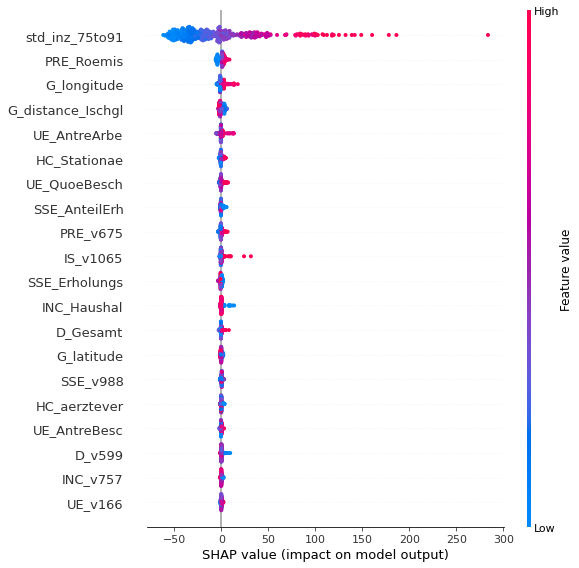

In [11]:
shap.summary_plot(shap_values, X,max_display=20) 

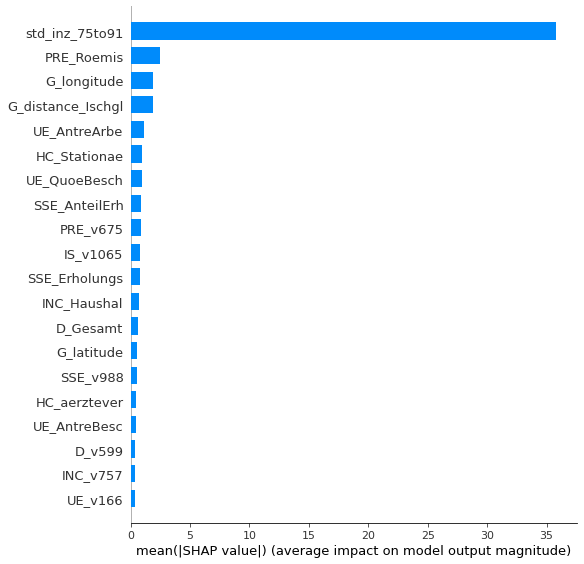

In [12]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=20)

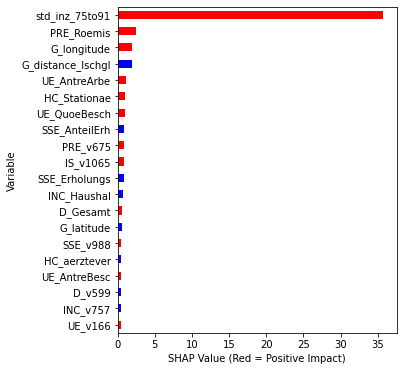

In [13]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X) 

# CatBoost

In [14]:
shap_values_cb = shap.TreeExplainer(cb).shap_values(X)

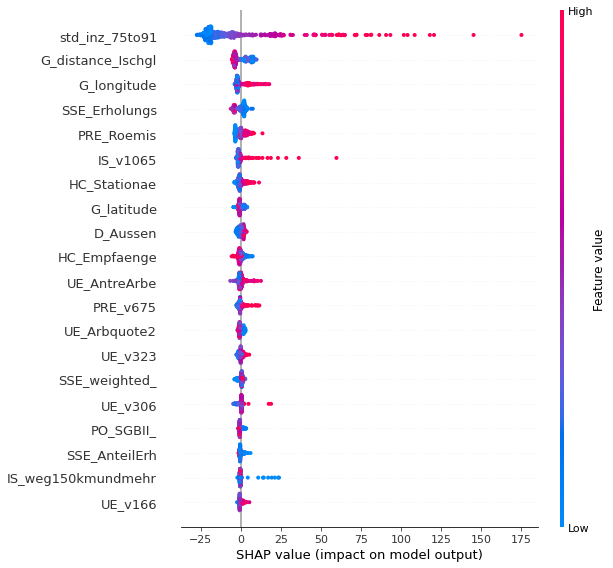

In [15]:
shap.summary_plot(shap_values_cb, X,max_display=20)  #TreeExpliner

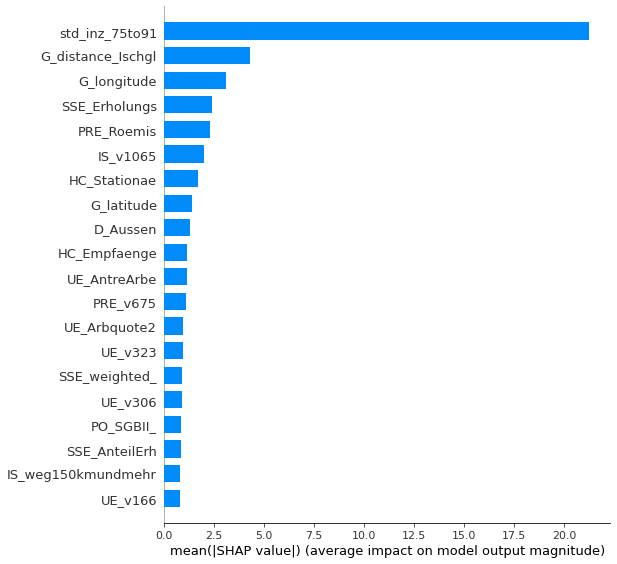

In [16]:
shap.summary_plot(shap_values_cb, X, plot_type="bar",max_display=20)

invalid value encountered in true_divide
invalid value encountered in true_divide


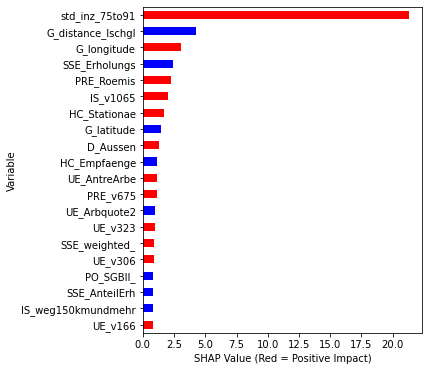

In [17]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values_cb,X) 